# Lung Cancer incidence in California
---
This script explores the relationship between counties in US with  lung cancer incidence, polution and economic variables.
In this script we show the relationship between Lung Cancer incidence for 2016 with various socioeconomic parameters 
The sources of data are Lung Cancer, 2016 EPA polution, US Census 2016 and Google Places API.


In [1]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Google developer API key
from config import gkey


# Data Retrieval

In [2]:
# cleaned data from several sources
data_df = pd.read_excel("Resources/Project_County_Data_Final.xlsx")
data_df["Cancer Prevalence per 1000"]=data_df["Lung Cancer Case Count"]/data_df["County Population"]*1000
del data_df["Cancer"]
del data_df["Lung Cancer Case Count"]
del data_df["Unnamed: 0"]
data_df=data_df.loc[data_df["State"]=="California"]

# Establish Correlations between variables

In [3]:

data_dfcorr=data_df
data_corr = data_dfcorr.corr()
corr_df = []
corr_df=data_corr.unstack().sort_values()
corr_df = pd.DataFrame(corr_df).reset_index()
corr_df.columns=["var1", "var2", "r_corr" ]
corr_df=corr_df.loc[corr_df["r_corr"] != 1]
corr_df['abs']= abs(corr_df["r_corr"])
corr_df=corr_df.sort_values(["abs"],ascending=False )
corr_df



,var1,var2,r_corr,abs
305,Hazardous Days,Max AQI,0.994878,0.994878
304,Max AQI,Hazardous Days,0.994878,0.994878
303,Hazardous Days,Days PM10,0.940735,0.940735
302,Days PM10,Hazardous Days,0.940735,0.940735
301,Days PM10,Max AQI,0.933231,0.933231
300,Max AQI,Days PM10,0.933231,0.933231
1,Good Days,Moderate Days,-0.872092,0.872092
0,Moderate Days,Good Days,-0.872092,0.872092
2,Percent Adult Smokers,Household Income,-0.851840,0.851840
3,Household Income,Percent Adult Smokers,-0.851840,0.851840


In [4]:
# create a table with correlation coeficients of interest

corr_df1=corr_df.loc[corr_df["var1"] == "Cancer Prevalence per 1000"]
corr_df1=corr_df1.sort_values(["abs"],ascending=False)
corr_df1

,var1,var2,r_corr,abs
289,Cancer Prevalence per 1000,Latitude,0.628186,0.628186
29,Cancer Prevalence per 1000,Moderate Days,-0.412407,0.412407
30,Cancer Prevalence per 1000,Longitude,-0.395457,0.395457
35,Cancer Prevalence per 1000,Household Income,-0.370120,0.370120
37,Cancer Prevalence per 1000,Unhealthy for Sensitive Groups Days,-0.358562,0.358562
46,Cancer Prevalence per 1000,County Population,-0.330203,0.330203
254,Cancer Prevalence per 1000,Good Days,0.325239,0.325239
48,Cancer Prevalence per 1000,Unhealthy Days,-0.317351,0.317351
55,Cancer Prevalence per 1000,Days PM10,-0.284157,0.284157
61,Cancer Prevalence per 1000,Days NO2,-0.275804,0.275804


In [5]:
# Plots

The r-squared is: -0.658942127644114


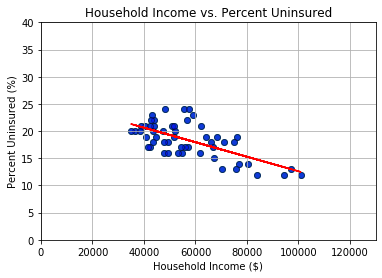

In [6]:
x_values = data_df["Household Income"]
y_values = data_df["Percent Uninsured"]

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq, (80000,35),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Household Income vs. Percent Uninsured")
plt.ylabel("Percent Uninsured (%)")
plt.xlabel("Household Income ($)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,130000)
plt.ylim(0,40)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/CAIncome_vs_Unninsure.png')

plt.show()

The r-squared is: -0.37012016458806485


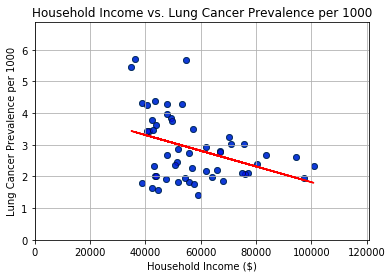

In [7]:
x_values = data_df["Household Income"]
y_values = data_df["Cancer Prevalence per 1000"]
x_max = max(x_values)*1.2
y_max = max(y_values)*1.2

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(80000,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Household Income vs. Lung Cancer Prevalence per 1000")
plt.ylabel("Lung Cancer Prevalence per 1000")
plt.xlabel("Household Income ($)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,x_max)
plt.ylim(0,y_max)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/CAIncome_vs_CancerPrevalence.png')

plt.show()

The r-squared is: -0.16108956164507823


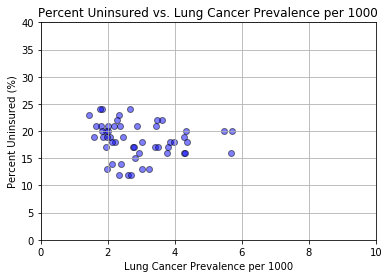

In [8]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Percent Uninsured"]
# print(max(x_values))
# print( max(y_values))

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Percent Uninsured vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Percent Uninsured (%)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,40)
rsq=rvalue*rvalue
# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/CAuninsured_vs_CancerPrevalence.png')

plt.show()


The r-squared is: -0.28415679533626287


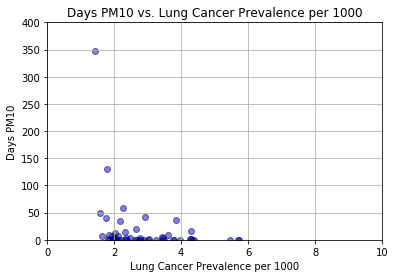

In [9]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Days PM10"]
# print(max(x_values))
# print( max(y_values))
# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Days PM10 vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Days PM10")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,400)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/CAParticulatesPM10_vs_CancerPrevalence.png')

plt.show()

The r-squared is: -0.23989452985944928


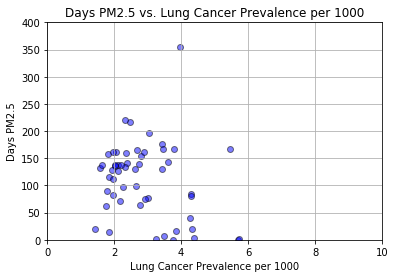

In [10]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Days PM2.5"]
# print(max(x_values))
# print( max(y_values))
# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Days PM2.5 vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Days PM2.5")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,400)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/CAParticulatesPM25_vs_CancerPrevalence.png')

plt.show()

The r-squared is: 0.2471069993608095


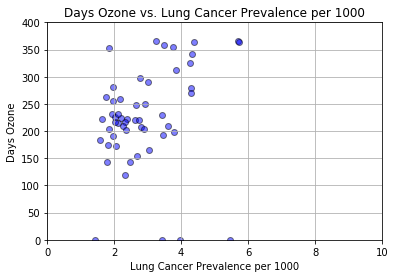

In [11]:

x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Days Ozone"]
# print(max(x_values))
# print( max(y_values))
# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Days Ozone vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Days Ozone")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,400)
rsq=rvalue*rvalue
# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/CAOzone_vs_CancerPrevalence.png')

plt.show()

## Heatmap 

In [12]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)


In [13]:
# Store 'Lat' and 'Lng' into  locations 
locations = data_df[["Latitude", "Longitude"]].astype(float)

# Convert Poverty Rate to float and store
income_rate = data_df["Household Income"].astype(float)
smokers_rate = data_df["Percent Adult Smokers"].astype(float)
cancer_rate = data_df["Cancer Prevalence per 1000"].astype(float)





In [14]:
# Create a  Heatmap layer
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=income_rate, 
                                 dissipating=False, max_intensity=100000,
                                 point_radius = 0.6)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
# Create a poverty Heatmap layer
fig = gmaps.figure()
heat_layer2 = gmaps.heatmap_layer(locations, weights=cancer_rate, 
                                 dissipating=False, max_intensity=5,
                                 point_radius = 0.6)
fig.add_layer(heat_layer2)
plt.savefig(f'output_plots/CancerCAheatmap.png')
fig


Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [227]:
# Create a combined map
fig = gmaps.figure()

fig.add_layer(heat_layer2)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))